In [1]:
import numpy as np
from datascience import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

# Python Dictionaries

It is time to learn another data structure built into Python -- dictionaries. With lists and arrays, you accessed elements index number.

In [3]:
my_list = ['Temple University', 2023, np.pi]
my_list

['Temple University', 2023, 3.141592653589793]

In [4]:
# Accessing the second element in my_list
my_list[1]

2023

In [5]:
my_array = make_array(1, 2, 3, 5, 7, 11, 13)
my_array

array([ 1,  2,  3,  5,  7, 11, 13])

In [6]:
# Accessing the second element in my_array
my_array[1]

2

By contrast, a dictionary stores any number of {key: value, key: value} pairs. You access a value in a dictionary by using its key. Dictionaries are defined using curly brackets. Notice that the values of a dictionary can be other data structures, such as a list.

In [7]:
cst = {
    "name": "College of Science and Technology",
    "departments": ["Biology", "Chemistry", "CIS", "Math", "EES", "Physics"],
    "dean": "Michael Klein",
}
cst

{'name': 'College of Science and Technology',
 'departments': ['Biology', 'Chemistry', 'CIS', 'Math', 'EES', 'Physics'],
 'dean': 'Michael Klein'}

In [8]:
# Access a dictionary element by key
print(cst['dean'])
print(cst['departments'])

Michael Klein
['Biology', 'Chemistry', 'CIS', 'Math', 'EES', 'Physics']


In [9]:
cst.keys()

dict_keys(['name', 'departments', 'dean'])

In [10]:
cst.values()

dict_values(['College of Science and Technology', ['Biology', 'Chemistry', 'CIS', 'Math', 'EES', 'Physics'], 'Michael Klein'])

Each key in a dictionary my be unique -- no duplicates. You can change a dictionary value simply by assigned a new value to a key.

In [11]:
cst['dean'] = 'Miguel Mustafa'
cst

{'name': 'College of Science and Technology',
 'departments': ['Biology', 'Chemistry', 'CIS', 'Math', 'EES', 'Physics'],
 'dean': 'Miguel Mustafa'}

## Hypothesis A/B Testing

The following example comes from your textbook. See the section on [A/B testing.](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)

"The table births contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy."

In [26]:
births = Table.read_table('data/baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


"One of the aims of the study was to see whether maternal smoking was associated with birth weight. Let’s see what we can say about the two variables."

In [27]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


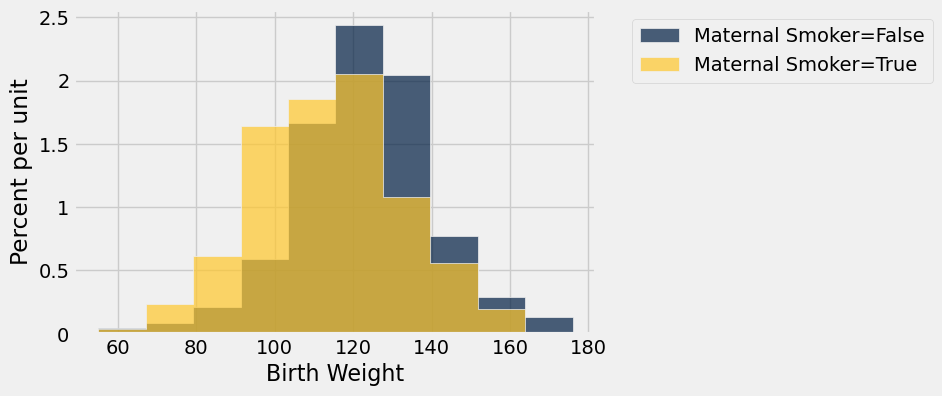

In [28]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

"This raises the question of whether the difference reflects just chance variation or a difference in the distributions in the larger population. Could it be that there is no difference between the two distributions in the population, but we are seeing a difference in the samples just because of the mothers who happened to be selected?"

**Null hypothesis:** In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The difference in the sample is due to chance.

**Alternative hypothesis:** In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.



In [30]:
smoking_and_birthweight.show(3)

Maternal Smoker,Birth Weight
False,120
False,113
True,128


In [29]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [31]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

In [32]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [33]:
# Test the function
difference_of_means(births, 'Maternal Smoker')

-9.266142572024918

### Predicting the Statistic Under the Null Hypothesis
"To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that.

If there were no difference between the two distributions in the underlying population, then whether a birth weight has the label True or False with respect to maternal smoking should make no difference to the average. The idea, then, is to shuffle all the labels randomly among the mothers. This is called random permutation.

Shuffling ensures that the count of True labels does not change, and nor does the count of False labels. This is important for the comparability of the simulated differences of means and the original difference of means. We will see later in the course that the sample size affects the variability of a sample mean.

Take the difference of the two new group means: the mean weight of the babies whose mothers have been randomly labeled smokers and the mean weight of the babies of the remaining mothers who have all been randomly labeled non-smokers. This is a simulated value of the test statistic under the null hypothesis."

In [41]:
# How does shuffling work?
quote = "Light travels faster than sound. This is why some people appear bright until you hear them speak."
quote_table = Table().with_column("Quote Words", quote.split())
quote_table

Quote Words
Light
travels
faster
than
sound.
This
is
why
some
people


In [43]:
quote_table.column("Quote Words")

array(['Light', 'travels', 'faster', 'than', 'sound.', 'This', 'is', 'why',
       'some', 'people', 'appear', 'bright', 'until', 'you', 'hear',
       'them', 'speak.'],
      dtype='<U7')

In [42]:
shuffled_words = quote_table.sample(with_replacement = False).column("Quote Words")
shuffled_words

array(['them', 'This', 'until', 'bright', 'travels', 'appear', 'speak.',
       'some', 'sound.', 'Light', 'why', 'you', 'is', 'hear', 'than',
       'faster', 'people'],
      dtype='<U7')

In [34]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement = False).column(0)
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label', shuffled_labels)

original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,False
False,113,False
True,128,False
True,108,False
False,136,False
False,138,False
False,132,True
False,120,False
True,143,False
False,140,False


"Each baby’s mother now has a random smoker/non-smoker label in the column Shuffled Label, while her original label is in Maternal Smoker. If the null hypothesis is true, all the random re-arrangements of the labels should be equally likely.

Let’s see how different the average weights are in the two randomly labeled groups."

In [44]:
shuffled_only = original_and_shuffled.select('Birth Weight','Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label,Birth Weight average
False,120.182
True,118.342


In [45]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

-1.8397702515349579

"But could a different shuffle have resulted in a larger difference between the group averages? To get a sense of the variability, we must simulate the difference many times.

As always, we will start by defining a function that simulates one value of the test statistic under the null hypothesis. This is just a matter of collecting the code that we wrote above.

The function is called one_simulated_difference_of_means. It takes no arguments, and returns the difference between the mean birth weights of two groups formed by randomly shuffling all the labels."

In [46]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = births.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [47]:
one_simulated_difference_of_means()

1.304633057574236

"Tests based on random permutations of the data are called permutation tests. We are performing one in this example. In the cell below, we will simulate our test statistic – the difference between the average birth weight of the two randomly formed groups – many times and collect the differences in an array."

In [48]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)    

Observed Difference: -9.266142572024918


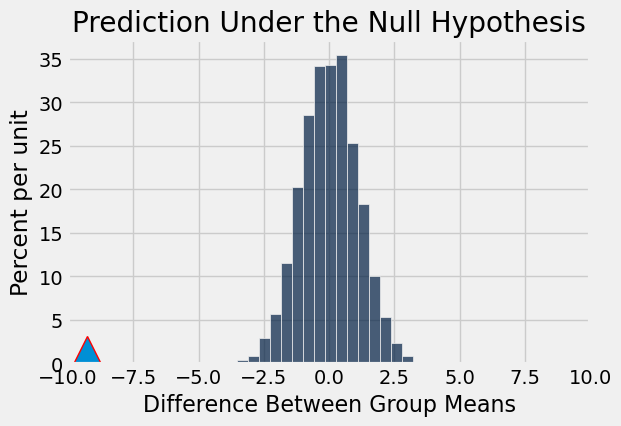

In [65]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
print('Observed Difference:', observed_difference)
ax = plt.gca()
ax.set_xlim((-10, 10))
ax.plot(observed_difference, 0,  marker='^', markersize=40, mec='red')
ax.set_title('Prediction Under the Null Hypothesis');

Notice how the distribution is centered roughly around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about 
 ounces, which doesn’t even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

The conclusion of the test is that the data favor the alternative over the null. It supports the hypothesis that the average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.

If you want to compute an empirical p-value, remember that low values of the statistic favor the alternative hypothesis.

In [51]:
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

0.0

**NOTE: Even though the difference in weight is only 9 ounces, we had a lot of data:**

In [66]:
smoking_and_birthweight.num_rows

1174

## What if we didn't have as much data?
Let's repeat the whole process, but with data for only 100 mothers.

In [83]:
small_data = smoking_and_birthweight.take(np.arange(100))
small_data

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [84]:
means_table = small_data.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,125.254
True,117.216


In [85]:
observed_difference = difference_of_means(small_data, 'Maternal Smoker')
observed_difference

-8.037752037752043

In [86]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = small_data.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = small_data.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')  

In [87]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)  

Observed Difference: -8.037752037752043


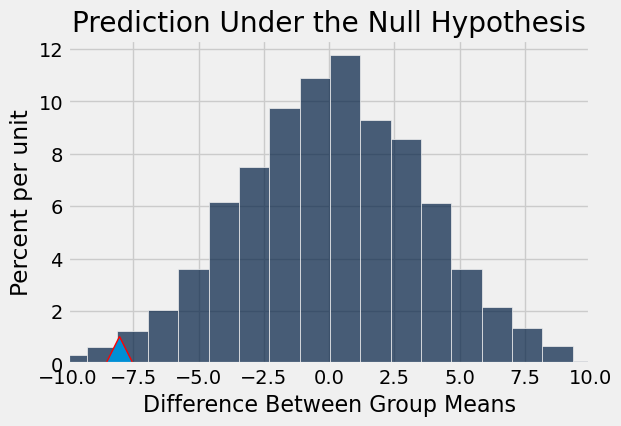

In [88]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
print('Observed Difference:', observed_difference)
ax = plt.gca()
ax.set_xlim((-10, 10))
ax.plot(observed_difference, 0,  marker='^', markersize=40, mec='red')
ax.set_title('Prediction Under the Null Hypothesis');

In [90]:
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

0.0126

Notice how much broader is the distribution of our simulated weight difference!

The result is still significane with 95% confidence, though not with 99% confidence.